# Buổi 04: Đầu tư định lượng dùng Pandas

In [87]:
!pip install yfinance

In [2]:
!pip install pandas_datareader
!pip install mplfinance

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import datetime as dt
import yfinance as yf
from IPython.display import display

# Bật chế độ inline để hiển thị biểu đồ trong notebook
%matplotlib inline

In [9]:
# Thiết lập thời gian
end = dt.datetime.now()
start = dt.datetime(2016, 1, 1)
print(f'{start} -> {end}')

# --- SỬA Ở ĐÂY ---
# Không dùng web.DataReader nữa (Yahoo bị chặn)
# Dùng trực tiếp yfinance để tải dữ liệu
df = yf.download('AAPL', start=start, end=end)

2016-01-01 00:00:00 -> 2025-10-08 15:44:57.738354


C:\Users\Admin\AppData\Local\Temp\ipykernel_24304\922594117.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [10]:
# Kiểm tra dữ liệu
display(df.head())
display(df.tail())

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-04,23.776182,23.780697,23.020129,23.157799,270597600
2016-01-05,23.180361,23.889019,23.112656,23.866451,223164000
2016-01-06,22.726732,23.103632,22.539413,22.695136,273829600
2016-01-07,21.767559,22.598089,21.763046,22.270843,324377600
2016-01-08,21.882658,22.367886,21.837521,22.241502,283192000


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-10-01,255.449997,258.790009,254.929993,255.039993,48713900
2025-10-02,257.130005,258.179993,254.149994,256.579987,42630200
2025-10-03,258.019989,259.239990,253.949997,254.669998,49155600
2025-10-06,256.690002,259.070007,255.050003,257.989990,44664100
2025-10-07,256.480011,257.399994,255.429993,256.809998,31923700


In [11]:
df.loc['2025-10-07']

Price   Ticker
Close   AAPL      2.564800e+02
High    AAPL      2.574000e+02
Low     AAPL      2.554300e+02
Open    AAPL      2.568100e+02
Volume  AAPL      3.192370e+07
Name: 2025-10-07 00:00:00, dtype: float64

In [65]:
import yfinance as yf
import datetime as dt

start = dt.datetime(2016, 1, 1)
end = dt.datetime.now()

df = yf.download('AAPL', start=start, end=end)

# Xuất file mới — KHÔNG lưu index, tránh bị “Unnamed: 0”
df.to_csv('AAPL_clean.csv', index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24304\54512141.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [88]:
import pandas as pd

df = pd.read_csv("AAPL_clean.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)
print(df.head())

                Close       High        Low       Open       Volume
Date                                                               
Date              NaN        NaN        NaN        NaN          NaN
2016-01-04  23.776173  23.780687  23.020120  23.157790  270597600.0
2016-01-05  23.180359  23.889017  23.112654  23.866449  223164000.0
2016-01-06  22.726732  23.103632  22.539413  22.695136  273829600.0
2016-01-07  21.767557  22.598087  21.763044  22.270841  324377600.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_24304\2644896769.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("AAPL_clean.csv", parse_dates=['Date'])


In [69]:
import pandas as pd

df_check = pd.read_csv("AAPL_clean.csv", nrows=2)
print(df_check.columns)

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [71]:
import pandas as pd

df = pd.read_csv("AAPL_clean.csv", parse_dates=['Price'])
df.rename(columns={'Price': 'Date'}, inplace=True)
df.set_index('Date', inplace=True)

print(df.head())

                Close       High        Low       Open       Volume
Date                                                               
Date              NaN        NaN        NaN        NaN          NaN
2016-01-04  23.776173  23.780687  23.020120  23.157790  270597600.0
2016-01-05  23.180359  23.889017  23.112654  23.866449  223164000.0
2016-01-06  22.726732  23.103632  22.539413  22.695136  273829600.0
2016-01-07  21.767557  22.598087  21.763044  22.270841  324377600.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_24304\64267377.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("AAPL_clean.csv", parse_dates=['Price'])


In [72]:
df.to_csv('AAPL_clean.csv')
df1 = pd.read_csv('AAPL_clean.csv', index_col='Date')

In [73]:
display(df1)

,Close,High,Low,Open,Volume
Date,,,,,
Date,NaN,NaN,NaN,NaN,NaN
2016-01-04,23.776173,23.780687,23.020120,23.157790,270597600.0
2016-01-05,23.180359,23.889017,23.112654,23.866449,223164000.0
2016-01-06,22.726732,23.103632,22.539413,22.695136,273829600.0
2016-01-07,21.767557,22.598087,21.763044,22.270841,324377600.0
...,...,...,...,...,...
2025-10-01,255.449997,258.790009,254.929993,255.039993,48713900.0
2025-10-02,257.130005,258.179993,254.149994,256.579987,42630200.0
2025-10-03,258.019989,259.239990,253.949997,254.669998,49155600.0


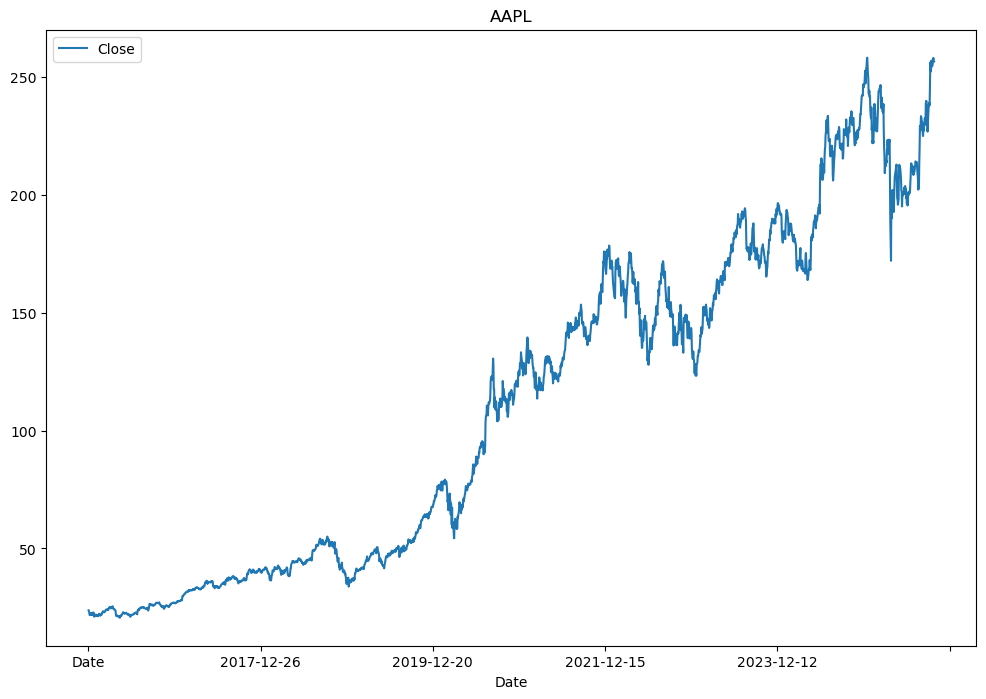

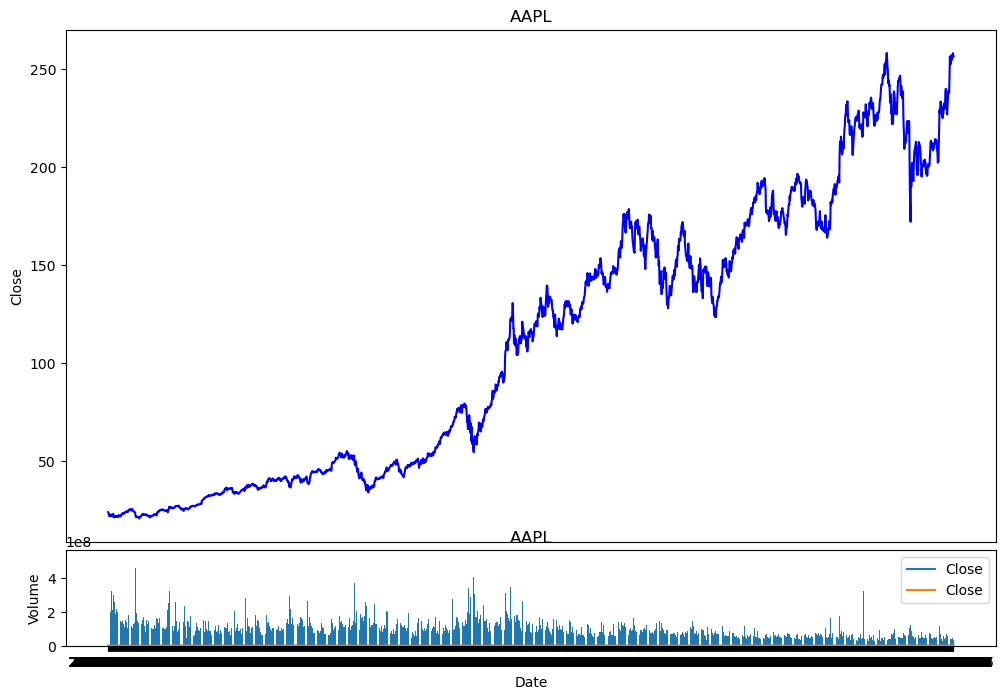

In [80]:
import matplotlib.pyplot as plt

df['Close'].plot(legend=True, figsize=(12,8), title='AAPL', label='Close')
plt.show()

In [83]:
plt.figure(figsize=(12, 9))

top = plt.subplot2grid((12, 9), (0, 0), rowspan=10, colspan=9)
bottom = plt.subplot2grid((12, 9), (10, 0), rowspan=2, colspan=9)

top.plot(df.index, df['Close'], color='blue')
bottom.bar(df.index, df['Volume'])

top.axes.get_xaxis().set_visible(False)
top.set_title('AAPL')
top.set_ylabel('Close')
bottom.set_ylabel('Volume')

Text(0, 0.5, 'Volume')

In [84]:
df.index

Index(['Date', '2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
       '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14',
       ...
       '2025-09-24', '2025-09-25', '2025-09-26', '2025-09-29', '2025-09-30',
       '2025-10-01', '2025-10-02', '2025-10-03', '2025-10-06', '2025-10-07'],
      dtype='object', name='Date', length=2456)

# END